This code demonstrates a step-by-step process to predict housing prices using a Linear Regression model. It begins by loading the dataset, handling missing values, and preparing the data by separating features (input variables) and the target variable (housing prices). Categorical features, if present, are converted to numerical values using one-hot encoding. The data is then split into training and testing sets to train the model and evaluate its performance. After training the model on the training data, predictions are made on the test set. The model’s accuracy is assessed using two metrics: Mean Squared Error (MSE), which measures the average error, and R-squared (R²), which indicates how well the model explains the data. Finally, a scatter plot visualizes the relationship between actual and predicted prices, with a regression line for reference, helping evaluate the model’s effectiveness in predicting housing prices.

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

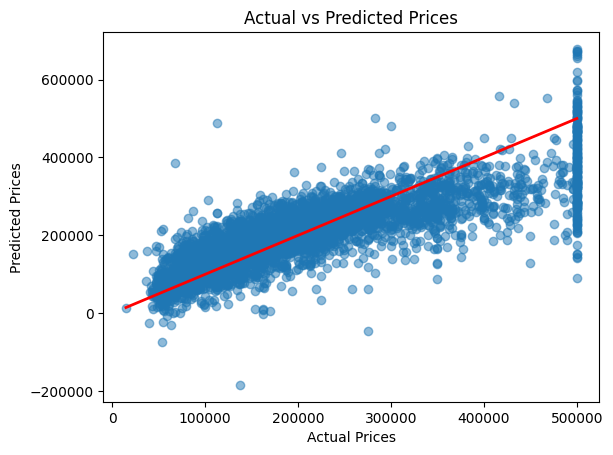

In [5]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.linear_model import LinearRegression  # For building the regression model
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating the model
import matplotlib.pyplot as plt  # For creating visualizations

# Load the dataset from the specified file path
file_path = '/content/drive/MyDrive/ML Models/Day 1: Predicting house prices/housing (1).csv'
df = pd.read_csv(file_path)  # Read the dataset into a DataFrame

# Step 2: Handle missing values
df = df.dropna()  # Remove rows with missing values
print(df)
# Step 3: Feature Selection
X = df.drop('median_house_value', axis=1)  # Define features by removing the target variable
y = df['median_house_value']  # Define the target variable (housing prices)

# Convert categorical columns to numeric if present
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical features

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Create train-test split

# Step 5: Train the Linear Regression Model
model = LinearRegression()  # Initialize the Linear Regression model
model.fit(X_train, y_train)  # Train the model using the training data

# Step 6: Make Predictions
y_pred = model.predict(X_test)  # Predict housing prices on the test data

# Step 7: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculate R-squared Score
print(f"Mean Squared Error: {mse}")  # Print the Mean Squared Error
print(f"R-squared Score: {r2}")  # Print the R-squared Score

# Step 8: Visualize Actual vs Predicted Prices
plt.scatter(y_test, y_pred, alpha=0.5)  # Create a scatter plot of actual vs. predicted prices
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Add regression line
plt.xlabel("Actual Prices")  # Label for the x-axis
plt.ylabel("Predicted Prices")  # Label for the y-axis
plt.title("Actual vs Predicted Prices")  # Title of the plot
plt.show()  # Display the plot
